# Day 1 - Data foundations practical tasks
***

These tasks cover data preparation, visualization and feature engineering topics.

## Explore the datasets and answer the questions below.
#### Here are some guidlines and advices you should consider:
* you can add as many cells as is comfortable for you for each answer
* some questions require your explanation. Add a cell and choose a markdown option in the menu 
* when you are making plots, please add labels to the axes

For this task you will use red wine dataset

In [1]:
import pandas as pd
import numpy as np
wine_data = pd.read_csv('winequality-red.csv', sep = ';')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
wine_data.isnull().values.sum()

np.int64(0)

### 1. `quality` attribute in the DataFrame has a score from 0 to 10. How many observations (rows) belong to each score level? 

In [15]:
df = pd.read_csv('winequality-red.csv', sep=';')
quality_counts = df['quality'].value_counts().sort_index()
print(quality_counts)

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


### 2. Make a bar plot, where we can see distribution of the samples against quality attributes.

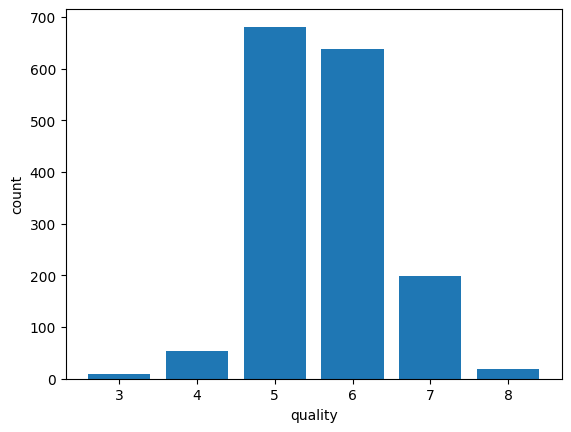

In [35]:
counts = wine_data['quality'].value_counts().sort_index()
plt.bar(counts.index, counts.values)
plt.xlabel('quality')
plt.ylabel('count')
plt.show()

### 3. What is the average value of each feature (column) in each `quality` score level? 

In [17]:
quality_means = wine_data.groupby('quality').mean(numeric_only=True)
quality_means

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### 4. What is the median value of each feature (column) in each `quality` score level? 

In [22]:

wine_data.groupby("quality").median(numeric_only=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.50,0.845,0.035,2.1,0.0905,6.0,15.0,0.997565,3.39,0.545,9.925
4,7.50,0.670,0.090,2.1,0.0800,11.0,26.0,0.996500,3.37,0.560,10.000
5,7.80,0.580,0.230,2.2,0.0810,15.0,47.0,0.997000,3.30,0.580,9.700
6,7.90,0.490,0.260,2.2,0.0780,14.0,35.0,0.996560,3.32,0.640,10.500
7,8.80,0.370,0.400,2.3,0.0730,11.0,27.0,0.995770,3.28,0.740,11.500
8,8.25,0.370,0.420,2.1,0.0705,7.5,21.5,0.994940,3.23,0.740,12.150


### 5. We can notice that for some features raw values differ significantly. Scale the data (except quality column) using Min-Max Scaling manually (create formula yourself). Then use built-in Min-Max Scaling function to validate results (display the resulting data frames separately).
#### Hint: you can use `pd.DataFrame(<your data>)` to display the result of the built-in function in a nicer way.

In [18]:
features = wine_data.drop(columns=["quality"])
manual_min = features.min()
manual_max = features.max()
manual_scaled = (features - manual_min) / (manual_max - manual_min)
manual_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
builtin_scaled = scaler.fit_transform(features)
builtin_scaled_df = pd.DataFrame(builtin_scaled, columns=features.columns)
builtin_scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


### 6. Create correlation matrix between all variables.

In [20]:
corr = wine_data.corr(numeric_only=True)
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


### 7. Plot heatmap to see correlations.

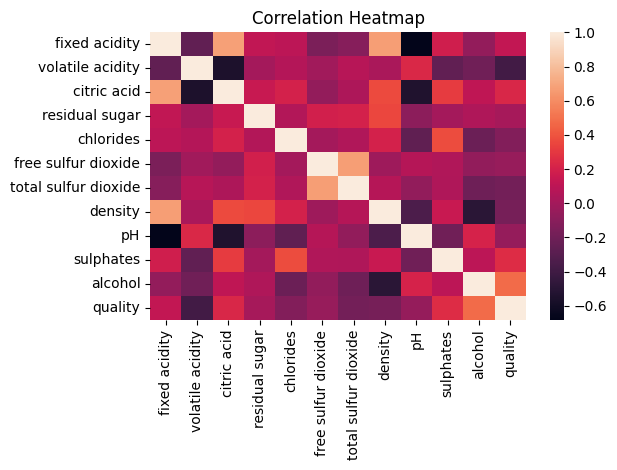

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

### 8. Identify the first and last 10% of data outliers in `alcohol`

In [39]:
alcohol = wine_data['alcohol']
low = alcohol.quantile(0.10)
high = alcohol.quantile(0.90)
first_10 = alcohol[alcohol <= low]
last_10 = alcohol[alcohol >= high]
low, high, first_10, last_10

(np.float64(9.3),
 np.float64(12.0),
 10      9.20
 13      9.10
 14      9.20
 15      9.20
 17      9.30
         ... 
 1515    9.25
 1521    9.05
 1533    9.00
 1568    9.20
 1589    9.20
 Name: alcohol, Length: 194, dtype: float64,
 45      13.1
 95      12.9
 131     13.0
 132     13.0
 142     14.0
         ... 
 1538    12.0
 1547    12.1
 1570    12.4
 1573    12.5
 1588    12.8
 Name: alcohol, Length: 162, dtype: float64)

### 9. Plot boxplots for all columns (except quality), use figure size 15x6. You can use both original and scaled data for this task. Try to interpret the data for one feature of your choice and write your observations.

C:\Users\renas.alp\AppData\Local\Temp\ipykernel_25204\2485684429.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(features_no_quality.values, labels=features_no_quality.columns)


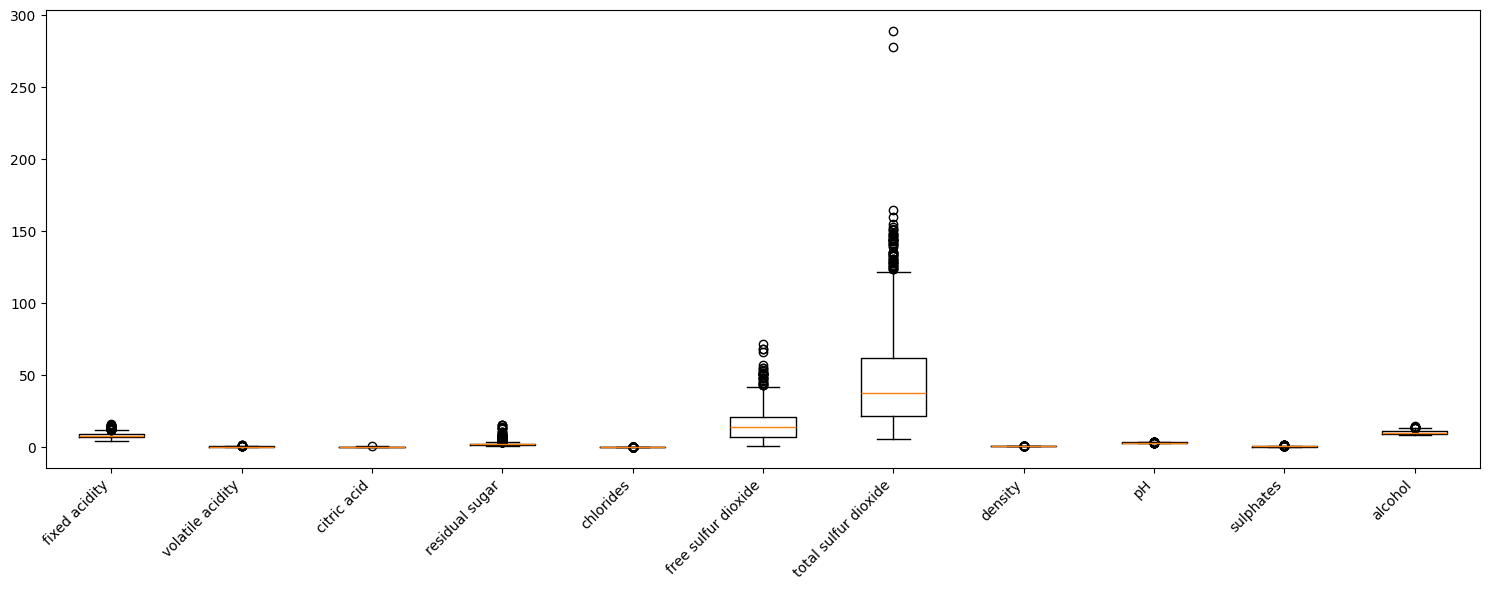

In [24]:
plt.figure(figsize=(15, 6))
features_no_quality = wine_data.drop(columns=["quality"])
plt.boxplot(features_no_quality.values, labels=features_no_quality.columns)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [37]:
#I checked the alcohol column and the values change a lot. There are some extreme values , so some wines have very high alcohol levels.

### 10. Plot boxplot of Ph for each quality type.

C:\Users\renas.alp\AppData\Local\Temp\ipykernel_25204\1570053962.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(ph_by_quality, labels=qualities)


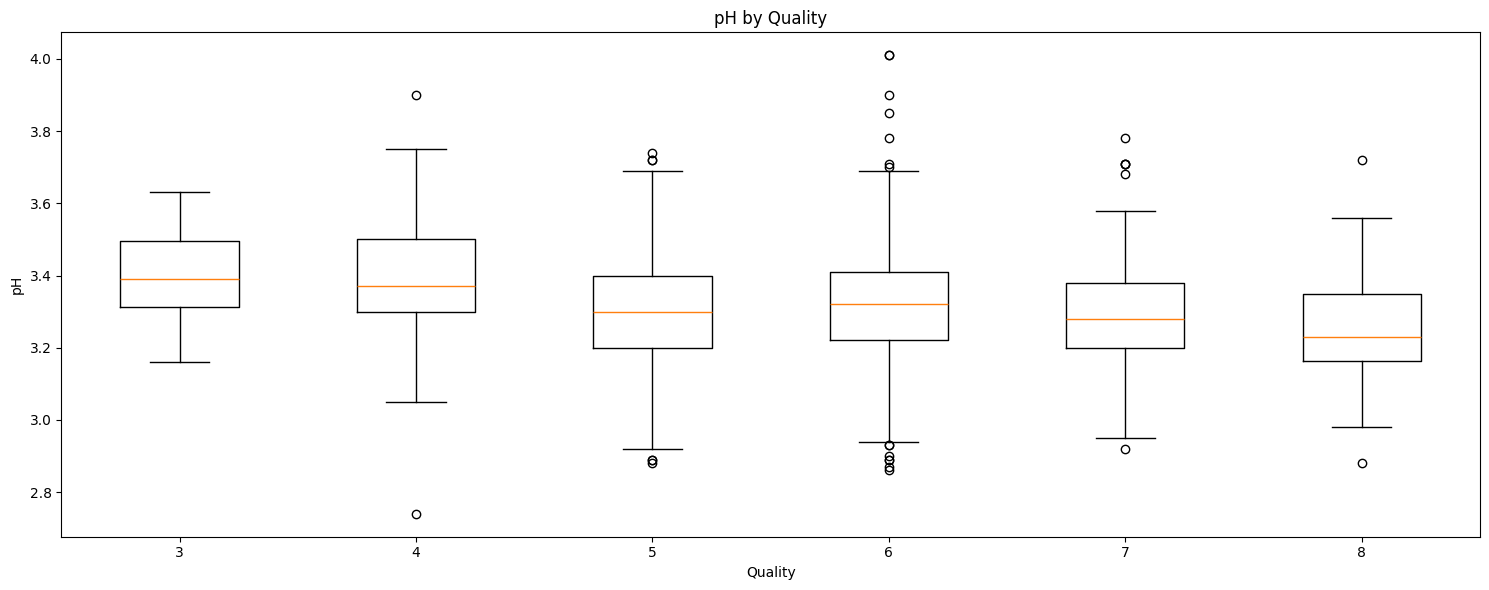

In [26]:
fig, ax = plt.subplots(figsize=(15, 6))
qualities = sorted(wine_data["quality"].unique())
ph_by_quality = [wine_data.loc[wine_data["quality"] == q, "pH"].dropna() for q in qualities]
ax.boxplot(ph_by_quality, labels=qualities)
ax.set_xlabel("Quality")
ax.set_ylabel("pH")
ax.set_title("pH by Quality")
plt.tight_layout()
plt.show()

### 11. Plot scatter plot for `quality` and column with strongest correlation to it. Does alcohol influence the quality of the wine?

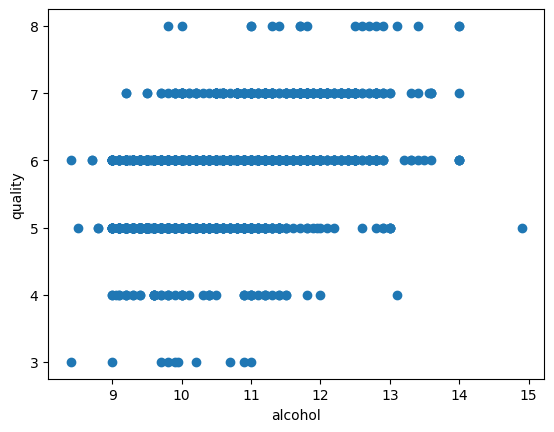

In [33]:
plt.scatter(wine_data['alcohol'], wine_data['quality'])
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.show()

In [41]:
# from the plot it looks like as alcohol increases, quality generally increases as well.So alcohol influenxces wine quality.

### 12. Plot scatter plot for any two columns and color it by `quality` number. Add color legend and write your observations.

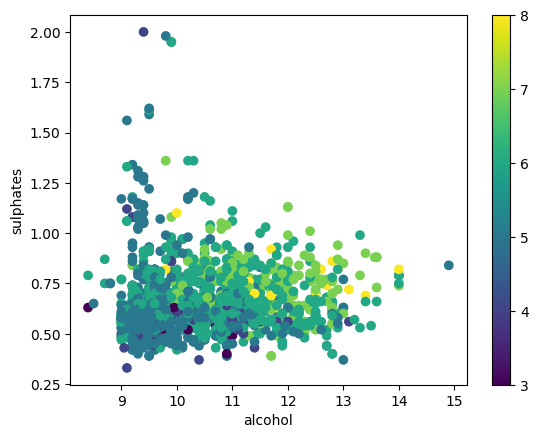

In [32]:
plt.scatter(wine_data['alcohol'], wine_data['sulphates'], c=wine_data['quality'])
plt.xlabel('alcohol')
plt.ylabel('sulphates')
plt.colorbar()
plt.show()

In [43]:
#Points with higher quality tend to appear where alcohol is higher but there is overlap between levels.

### 13. Create X, y for independent variables (all except `quality`) and target variable `quality`, perform k-fold k=3 split on them and calculate and print out the length of training set and testing set for each fold

In [28]:
from sklearn.model_selection import KFold

X = wine_data.drop(columns=['quality'])
y = wine_data['quality']

kf = KFold(n_splits=3, shuffle=True, random_state=42)

In [29]:
fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Fold {fold}:")
    print("Train size:", len(X_train))
    print("Test size:", len(X_test))
    fold += 1

Fold 1:
Train size: 1066
Test size: 533
Fold 2:
Train size: 1066
Test size: 533
Fold 3:
Train size: 1066
Test size: 533


### 14. Create two new features:
- Sulfur dioxide ration (`free sulfur dioxide` / `total sulfur dioxide`)
- Total acidity (`fixed acidity` + `volatile acidity` + `citric acid`)

In [34]:
wine_data['sulfur_dioxide_ratio'] = wine_data['free sulfur dioxide'] / wine_data['total sulfur dioxide']
wine_data['total_acidity'] = wine_data['fixed acidity'] + wine_data['volatile acidity'] + wine_data['citric acid']

wine_data[['sulfur_dioxide_ratio', 'total_acidity']].head()

,sulfur_dioxide_ratio,total_acidity
0,0.323529,8.10
1,0.373134,8.68
2,0.277778,8.60
3,0.283333,12.04
4,0.323529,8.10


### 15. Create a sample dataset with dates for a whole week. Extract day of the week with `dayofweek` function (0=Monday, 6=Sunday). Additionally flag weekends by creating another new `is_weekend` feature.

In [40]:
import pandas as pd

df = pd.DataFrame({'date': pd.date_range(start='2026-02-09', periods=7)})
df['day_of_week'] = df['date'].dt.dayofweek

df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

df

,date,day_of_week,is_weekend
0,2026-02-09,0,0
1,2026-02-10,1,0
2,2026-02-11,2,0
3,2026-02-12,3,0
4,2026-02-13,4,0
5,2026-02-14,5,1
6,2026-02-15,6,1
